In [735]:
# Gerekli Kütüphaneleri Yükleme

# pandas: Veri analizi ve manipülasyonu için kullanılır. DataFrame ve Series yapıları ile veriyi tablo halinde işleyebilir.
import pandas as pd

# numpy: Sayısal işlemler için optimize edilmiş bir kütüphane. Çok boyutlu dizileri (ndarray) destekler ve matris işlemleri yapabilir.
import numpy as np

# sklearn (Scikit-learn): Makine öğrenmesi algoritmalarını içeren bir kütüphane. Model oluşturma, eğitim, test işlemleri yapabilir.
import sklearn 

# seaborn: Gelişmiş veri görselleştirme kütüphanesi. matplotlib ile entegre çalışır ve daha estetik grafikler çizer.
import seaborn as sns

# matplotlib.pyplot: Grafik çizmek için kullanılan temel Python kütüphanesi. Seaborn’ın temel aldığı yapı.
import matplotlib.pyplot as plt

# MinMaxScaler: Verileri [0,1] aralığında ölçeklendirmek için kullanılır. Aykırı değerlerden etkilenmeden tüm değerleri belirli bir aralığa çeker.
# LabelEncoder: Kategorik değişkenleri sayısal değerlere dönüştürmek için kullanılır. Örneğin, "erkek" ve "kadın" değerlerini 0 ve 1 olarak kodlayabilir.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [737]:
# Titanic Veri Setini Yükleme
file_path = "data/Titanic-Dataset.csv"  # Yüklenen dosyanın yolu
df = pd.read_csv(file_path)
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [739]:
# Veri Setini İnceleme
# Satır sütun sayısını göster
df.shape

(891, 12)

In [741]:
# Boyutu göster
df.size

10692

In [743]:
# Sütunları göster
df.columns


# PassengerId: Yolcu numarası (her yolcu için benzersiz) -> Sayısal
# Survived: Hayatta kalma durumu (0 = Hayır, 1 = Evet) -> Kategorik (Binary)
# Pclass: Bilet sınıfı (1 = Birinci, 2 = İkinci, 3 = Üçüncü) -> Kategorik
# Name: Yolcunun adı -> Metin
# Sex: Cinsiyet (male, female) -> Kategorik
# Age: Yaş -> Sayısal
# SibSp: Gemideki kardeş/eş sayısı -> Sayısal
# Parch: Gemideki ebeveyn/çocuk sayısı -> Sayısal
# Ticket: Bilet numarası -> Metin
# Fare: Ödenen ücret -> Sayısal
# Cabin: Kabin numarası (birçok eksik veri içerir) -> Metin
# Embarked: Biniş limanı (C = Cherbourg, Q = Queenstown, S = Southampton) -> Kategorik

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [745]:
# Veri setinin genel bilgileri
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [747]:
# Veri setinin istatistiksel özeti
df.describe().T

# count:	Geçerli veri sayısı (eksik olmayan değerler)
# mean:	Ortalama (mean) değeri
# std:	Standart sapma (verinin yayılımı)
# min:	Minimum değer (verideki en küçük değer)
# 25%:	1. Çeyrek (Q1) - Verinin %25’inin altında olduğu değer
# 50%:	Medyan (Ortanca, Q2) - Verinin ortasındaki değer
# 75%:	3. Çeyrek (Q3) - Verinin %75’inin altında olduğu değer
# max:	Maksimum değer (verideki en büyük değer)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [749]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

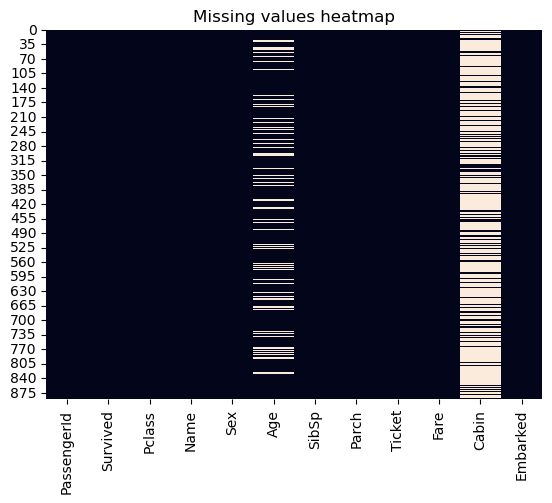

In [751]:
# veri setindeki eksik değerleri (NaN olan hücreleri) görselleştir
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

<Axes: >

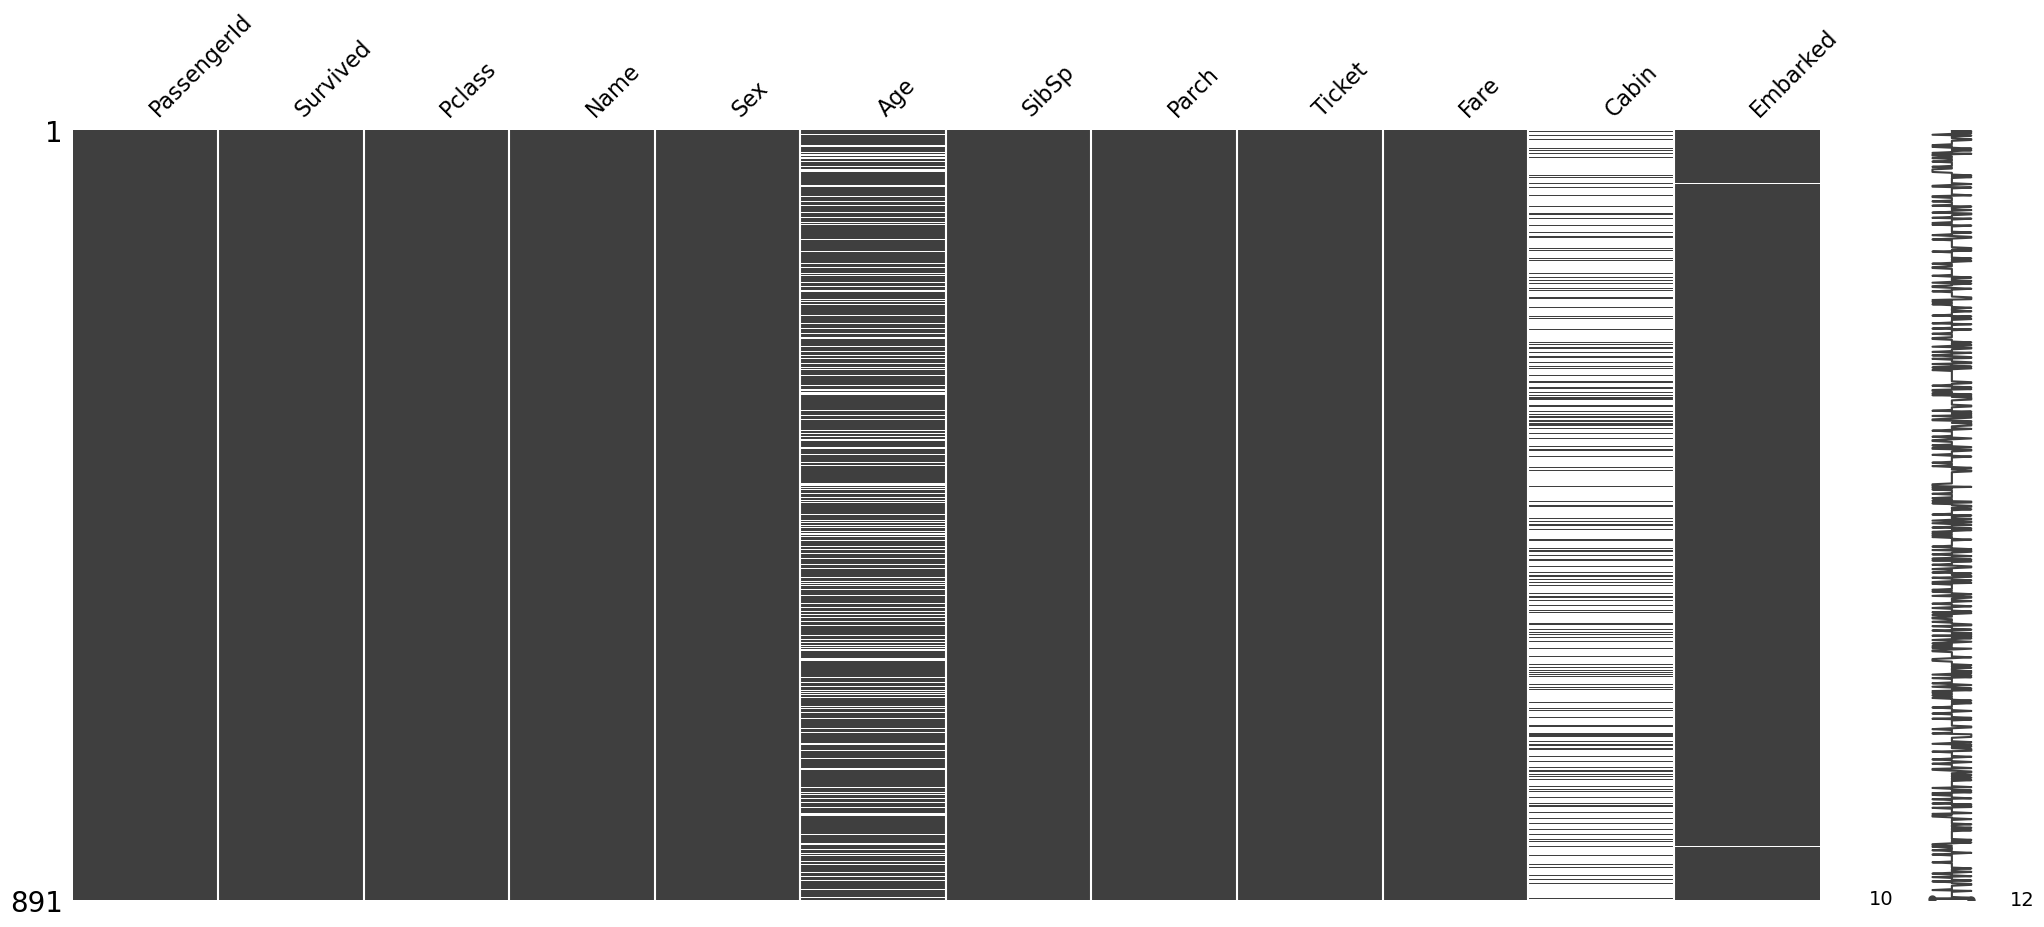

In [753]:
# Gerekirse kütüphaneyi yükle
# !pip install missingno  
# veri setindeki eksik verileri analiz etmek için özel olarak geliştirilmiş bir kütüphanedir.
import missingno as msno

# Eksik değerleri görselleştir
msno.matrix(df)

In [755]:
# Eksik verileri olan sütunların ilk 10 satırını görüntüle
# iloc[], index bazlı seçim yapmak için kullanılır.
df[["Age","Embarked","Cabin"]].iloc[0:10]

,Age,Embarked,Cabin
0,22.0,S,NaN
1,38.0,C,C85
2,26.0,S,NaN
3,35.0,S,C123
4,35.0,S,NaN
5,NaN,Q,NaN
6,54.0,S,E46
7,2.0,S,NaN
8,27.0,S,NaN
9,14.0,C,NaN


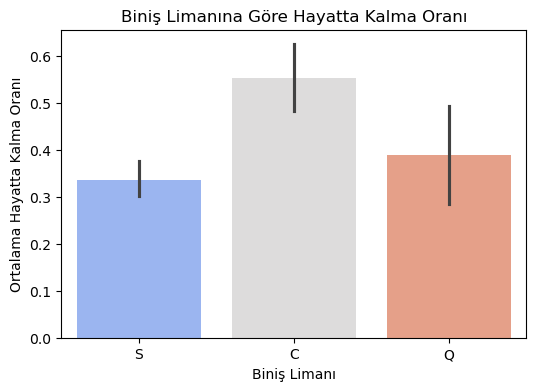

In [757]:
# Veri Setinin Görselleştirilmesi
# Biniş Limanına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4)) # Grafik boyutunu belirle
sns.barplot(x="Embarked", y="Survived", hue="Embarked", data=df, palette="coolwarm", legend=False)
plt.xlabel("Biniş Limanı") # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı") # Y ekseni etiketi
plt.title("Biniş Limanına Göre Hayatta Kalma Oranı") # Grafik başlığı
plt.show()

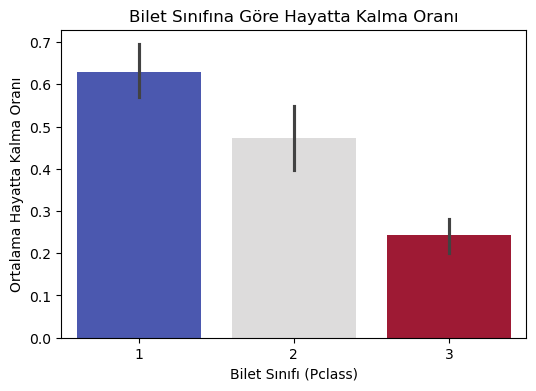

In [759]:
# Bilet Sınıfına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="coolwarm", legend=False)
plt.xlabel("Bilet Sınıfı (Pclass)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Bilet Sınıfına Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

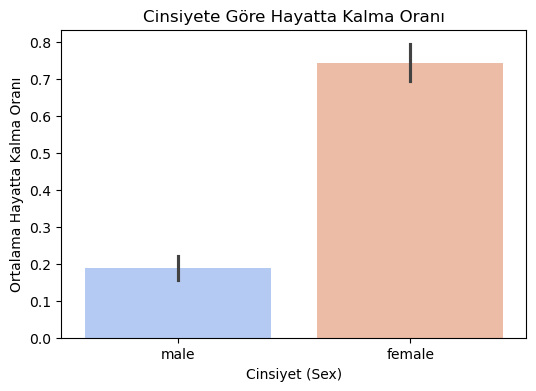

In [761]:
# Cinsiyete Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="coolwarm", legend=False)
plt.xlabel("Cinsiyet (Sex)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

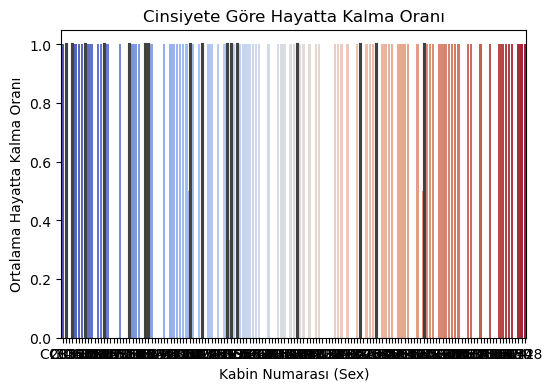

In [763]:
# Kabin Numarasına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Cabin", y="Survived", hue="Cabin", data=df, palette="coolwarm", legend=False)
plt.xlabel("Kabin Numarası (Sex)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

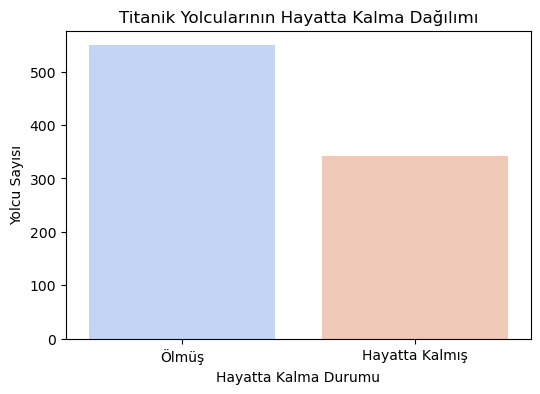

In [764]:
# Titanik Yolcularının Hayatta Kalma Dağılımı
plt.figure(figsize=(6,4))
Survived = df["Survived"].value_counts()

sns.barplot(y=Survived.values, x=Survived.index, hue=Survived.index, palette="coolwarm", alpha=0.8, legend=False)
plt.title("Titanik Yolcularının Hayatta Kalma Dağılımı", fontsize=12)
plt.xlabel("Hayatta Kalma Durumu", fontsize=10)
plt.ylabel("Yolcu Sayısı", fontsize=10)
plt.xticks(ticks=[0,1], labels=["Ölmüş", "Hayatta Kalmış"])
plt.show()

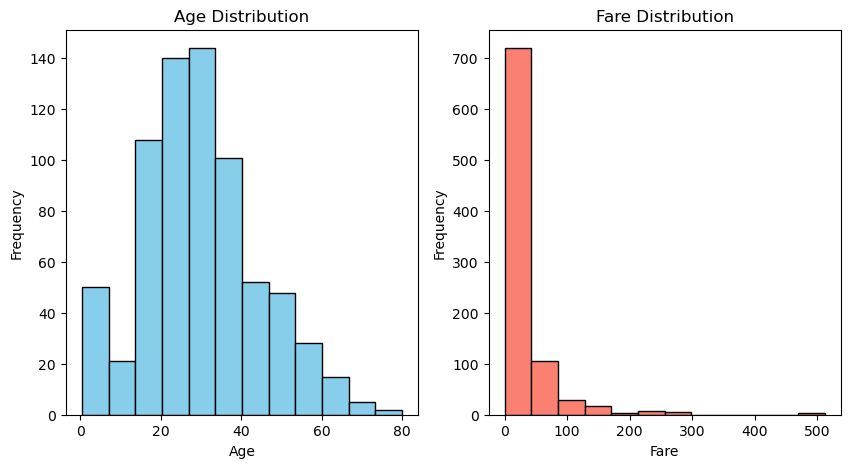

In [765]:
# Age(Yaş) ve Fare(Bilet ücreti) Sütunlarının Histogram Dağılımları
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Yaş Histogramı
ax1.hist(df["Age"].dropna(), bins=12, color="skyblue", edgecolor="black")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.set_title("Age Distribution")

# Bilet Ücreti Histogramı
ax2.hist(df["Fare"], bins=12, color="salmon", edgecolor="black")
ax2.set_xlabel("Fare")
ax2.set_ylabel("Frequency")
ax2.set_title("Fare Distribution")

plt.show()

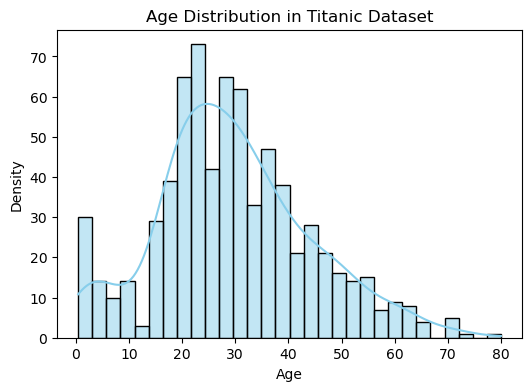

In [660]:
# Age(Yaş) sütununun yoğunluk grafiği
plt.figure(figsize=(6,4))

# Güncel yöntem: Histogram ve KDE ayrı ayrı çiz
sns.histplot(df["Age"], kde=True, bins=30, color="skyblue")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution in Titanic Dataset")
plt.show()

In [769]:
# İlk 20 satırı göster
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [771]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [773]:
# Yaşı (Age) eksik olanları ortalama(mean) ile dolduralım
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [775]:
# İlk 5 satırı göster
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [777]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [779]:
# Embarked sütunundaki eksik değerlerin bulunduğu satır numaraları
nan_rows = df[df["Embarked"].isnull()].index
print("Embarked sütununda NaN değerlerin bulunduğu satır numaraları:", nan_rows.tolist())

Embarked sütununda NaN değerlerin bulunduğu satır numaraları: [61, 829]


In [781]:
df[["Embarked"]].iloc[60:70]

,Embarked
60,C
61,NaN
62,S
63,S
64,C
65,C
66,S
67,S
68,S
69,S


In [783]:
# Limanlara göre binen yolcu sayıları
embarked_counts = df["Embarked"].value_counts()
print(embarked_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [785]:
# Embarked sütunundaki eksik değerleri en sık tekrar eden (mode) değerle dolduralım
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [787]:
print("Eksik değer sayısı Embarked:", df["Embarked"].isnull().sum())

Eksik değer sayısı Embarked: 0


In [789]:
df[["Embarked"]].iloc[60:70]

,Embarked
60,C
61,S
62,S
63,S
64,C
65,C
66,S
67,S
68,S
69,S


In [791]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [793]:
# Cabin sütunu çok fazla eksik veri içerdiği için tamamen kaldırılır.
df.drop(columns=["Cabin"], inplace=True)

In [795]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [797]:
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [799]:
# Gereksiz Sütunları Kaldırma
# PassengerId, Name ve Ticket sütunları çıkarıldı
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [801]:
# İlk 5 satırı göster
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [803]:
from scipy.stats import zscore

# Sayısal sütunları seç (örneğin: Age ve Fare)
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]  # Titanic veri setinde bu sütunlar sayısal

# Z-Skoru hesaplama
z_scores = df[numeric_cols].apply(zscore)

# |Z| > 3 olanları aykırı olarak işaretleme
outliers = (z_scores.abs() > 3)

# Aykırı değer içeren satırları filtreleme
outlier_rows = df[outliers.any(axis=1)]

# **Aykırı değer içeren satırları göster**
print("Aykırı değer içeren satırlar:")
print(outlier_rows)

# Aykırı değerlerin her sütunda kaç tane olduğunu gösterme
outlier_counts = pd.DataFrame({'Sütun': numeric_cols, 'Aykırı Değer Sayısı': outliers.sum().values})
print(outlier_counts)

Aykırı değer içeren satırlar:
     Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
13          0       3    male  39.000000      1      5   31.2750        S
16          0       3    male   2.000000      4      1   29.1250        Q
25          1       3  female  38.000000      1      5   31.3875        S
27          0       1    male  19.000000      3      2  263.0000        S
50          0       3    male   7.000000      4      1   39.6875        S
..        ...     ...     ...        ...    ...    ...       ...      ...
850         0       3    male   4.000000      4      2   31.2750        S
851         0       3    male  74.000000      0      0    7.7750        S
858         1       3  female  24.000000      0      3   19.2583        C
863         0       3  female  29.699118      8      2   69.5500        S
885         0       3  female  39.000000      0      5   29.1250        Q

[71 rows x 8 columns]
   Sütun  Aykırı Değer Sayısı
0    Age                    7

In [805]:
# Sayısal sütunları seçme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Aykırı değerleri tespit etmek için bir sözlük oluşturalım
outlier_dict = {}

# IQR yöntemi ile aykırı değerleri tespit etme
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 1. Çeyrek (Q1)
    Q3 = df[col].quantile(0.75)  # 3. Çeyrek (Q3)
    IQR = Q3 - Q1  # IQR hesaplama

    # Alt ve üst sınırları belirleme
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    # Aykırı değerleri tespit etme
    outliers = df[(df[col] < alt_sinir) | (df[col] > ust_sinir)]
    
    # Aykırı değerlerin sayısını kaydetme
    outlier_dict[col] = len(outliers)

    # Daha önce eklenen satırlarla birleştirme (tekrar edenleri önlemek için)
    outlier_rows = pd.concat([outlier_rows, outliers]).drop_duplicates()

# Aykırı değer içeren satırları ekrana yazdırma
print("Aykırı Değer İçeren Satırlar (IQR Yöntemi):")
print(outlier_rows)

# Aykırı değer sayısını içeren bir DataFrame oluşturma
outlier_counts = pd.DataFrame({'Sütun': numeric_cols, 'Aykırı Değer Sayısı': outlier_dict.values()})

# Sonuçları yazdırma
print(outlier_counts)

Aykırı Değer İçeren Satırlar (IQR Yöntemi):
     Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
13          0       3    male  39.000000      1      5   31.2750        S
16          0       3    male   2.000000      4      1   29.1250        Q
25          1       3  female  38.000000      1      5   31.3875        S
27          0       1    male  19.000000      3      2  263.0000        S
50          0       3    male   7.000000      4      1   39.6875        S
..        ...     ...     ...        ...    ...    ...       ...      ...
855         1       3  female  18.000000      0      1    9.3500        S
869         1       3    male   4.000000      1      1   11.1333        S
871         1       1  female  47.000000      1      1   52.5542        S
880         1       2  female  25.000000      0      1   26.0000        S
888         0       3  female  29.699118      1      2   23.4500        S

[303 rows x 8 columns]
   Sütun  Aykırı Değer Sayısı
0    Age      

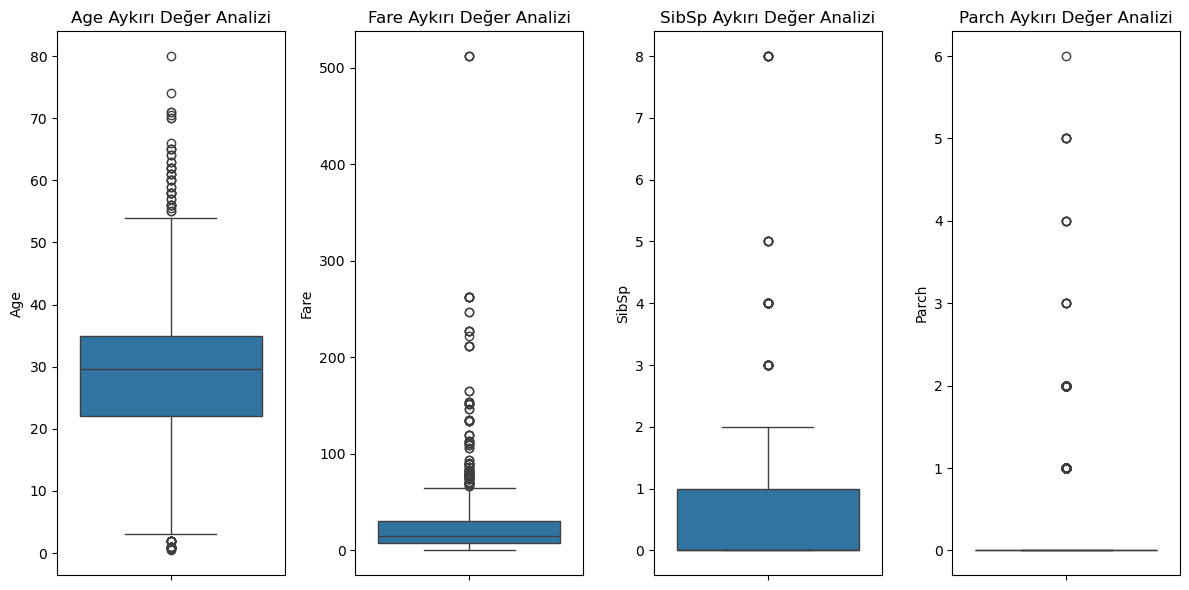

In [807]:
# Sürekli değişkenler için aykırı değer tespiti
# Sayısal sütunları seçelim
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Grafik boyutunu ayarla
plt.figure(figsize=(12,6))

# Her değişken için ayrı kutu grafiği çiz
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)  # Alt grafikler oluştur
    sns.boxplot(y=df[col])
    plt.title(f"{col} Aykırı Değer Analizi")

plt.tight_layout()  # Grafiklerin üst üste binmesini önler
plt.show()

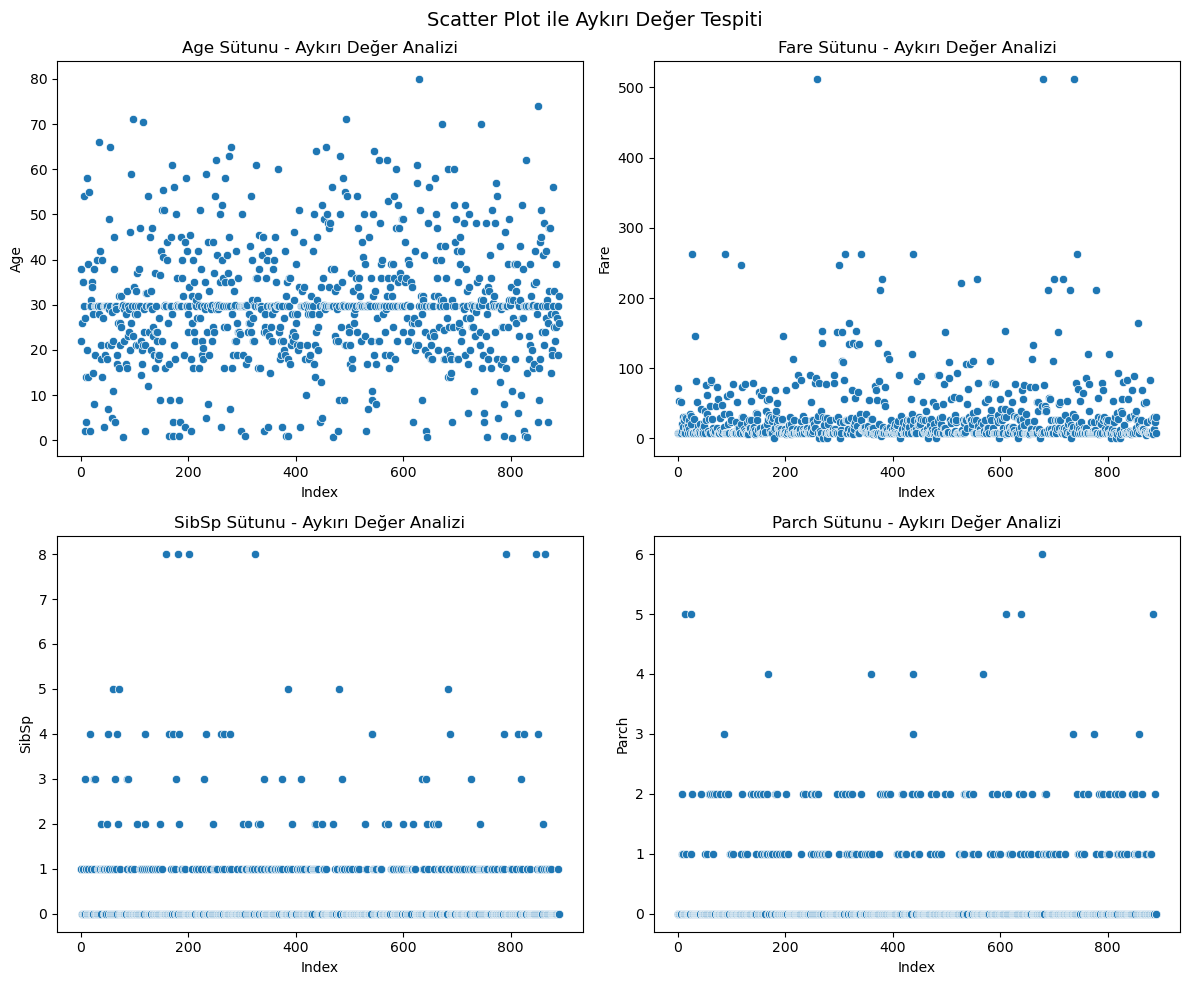

In [809]:
# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Scatter Plot ile aykırı değerleri görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Scatter Plot ile Aykırı Değer Tespiti", fontsize=14)

for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    
    # Scatter plot çizimi
    sns.scatterplot(x=df.index, y=df[col], ax=ax)
    
    # Başlık ekleme
    ax.set_title(f"{col} Sütunu - Aykırı Değer Analizi")
    ax.set_xlabel("Index")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

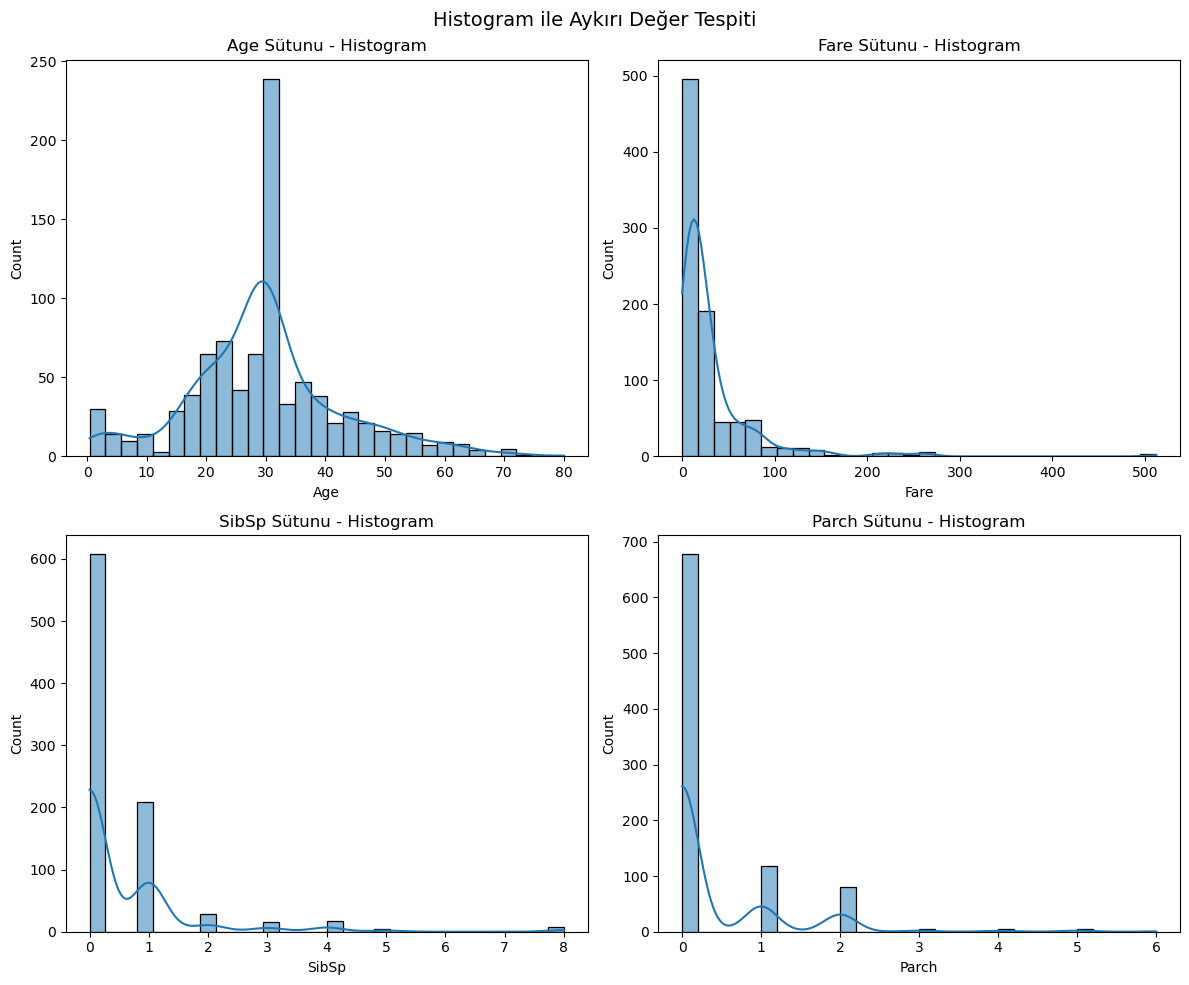

In [811]:
# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histogram ile aykırı değer tespiti için görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Histogram ile Aykırı Değer Tespiti", fontsize=14)

for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    
    # Histogram çizimi
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    
    # Başlık ekleme
    ax.set_title(f"{col} Sütunu - Histogram")

plt.tight_layout()
plt.show()

In [813]:
from sklearn.neighbors import LocalOutlierFactor

# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Eksik değerleri doldurma (LOF eksik değerlerle çalışamaz, bu yüzden ortalama ile dolduralım)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# LOF Modelini oluşturma
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # %5 aykırı değer kabul edelim

# Aykırı değerleri tespit etme
outlier_flags = lof.fit_predict(df[numeric_cols])

# LOF skorlarını al (negatif olduğu için mutlak değer alıyoruz)
lof_scores = -lof.negative_outlier_factor_

# Aykırı değerleri içeren satırları seçme
outlier_rows = df[lof_scores > 1.5]

# **Aykırı değerleri ekrana yazdırma**
print("LOF Yöntemiyle Tespit Edilen Aykırı Değerler:")
print(outlier_rows)

# Her sütun için ayrı ayrı LOF çalıştırarak aykırı değerleri bulma
outlier_counts = {}

for col in numeric_cols:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # %5 aykırı değer kabul edelim
    
    # LOF modelini sadece o sütun için çalıştır
    outlier_flags = lof.fit_predict(df[[col]])  # Tek sütun için çalıştırıyoruz
    
    # Aykırı değer olan satırları say
    outlier_counts[col] = sum(outlier_flags == -1)

# Sonuçları DataFrame olarak gösterelim
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=["Sütun", "Aykırı Değer Sayısı"])

# Sonuçları ekrana yazdırma
print(outlier_counts_df)


LOF Yöntemiyle Tespit Edilen Aykırı Değerler:
     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
5           0       3    male  29.699118      0      0   8.4583        Q
33          0       2    male  66.000000      0      0  10.5000        S
39          1       3  female  14.000000      1      0  11.2417        C
57          0       3    male  28.500000      0      0   7.2292        C
66          1       2  female  29.000000      0      0  10.5000        S
..        ...     ...     ...        ...    ...    ...      ...      ...
815         0       1    male  29.699118      0      0   0.0000        S
822         0       1    male  38.000000      0      0   0.0000        S
851         0       3    male  74.000000      0      0   7.7750        S
868         0       3    male  29.699118      0      0   9.5000        S
872         0       1    male  33.000000      0      0   5.0000        S

[79 rows x 8 columns]
   Sütun  Aykırı Değer Sayısı
0    Age                 

In [815]:
from sklearn.neighbors import NearestNeighbors

# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Eksik değerleri doldurma (KNN eksik değerlerle çalışamaz, bu yüzden ortalama ile dolduralım)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Her sütun için ayrı ayrı KNN yöntemiyle aykırı değerleri tespit etme
outlier_counts = {}
outlier_values = {}
outlier_indices = []

for col in numeric_cols:
    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(df[[col]])  # Sadece ilgili sütunu kullan
    distances, _ = knn.kneighbors(df[[col]])
    
    # En uzak 5. komşuya olan mesafeyi alıyoruz
    threshold = np.mean(distances[:, -1]) + 2 * np.std(distances[:, -1])
    
    # Aykırı değerleri belirleme
    outliers = df[distances[:, -1] > threshold]
    outlier_counts[col] = outliers.shape[0]
    outlier_values[col] = outliers[[col]]
    outlier_indices.extend(outliers.index.tolist())

# Aykırı değer içeren satırları seçelim
outlier_indices = list(set(outlier_indices))  # Tekrarlı indexleri kaldır
outlier_rows = df.loc[outlier_indices]

# Sonuçları ekrana yazdırma
print("KNN Yöntemiyle Tespit Edilen Aykırı Değerler:")
print(outlier_rows)

print("\nAykırı Değer Sayıları:")
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=["Sütun", "Aykırı Değer Sayısı"])
print(outlier_counts_df)

KNN Yöntemiyle Tespit Edilen Aykırı Değerler:
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
258         1       1  female  35.0      0      0  512.3292        C
772         0       2  female  57.0      0      0   10.5000        S
777         1       3  female   5.0      0      0   12.4750        S
780         1       3  female  13.0      0      0    7.2292        C
15          1       2  female  55.0      0      0   16.0000        S
..        ...     ...     ...   ...    ...    ...       ...      ...
625         0       1    male  61.0      0      0   32.3208        S
626         0       2    male  57.0      0      0   12.3500        Q
630         1       1    male  80.0      0      0   30.0000        S
252         0       1    male  62.0      0      0   26.5500        S
125         1       3    male  12.0      1      0   11.2417        C

[62 rows x 8 columns]

Aykırı Değer Sayıları:
   Sütun  Aykırı Değer Sayısı
0    Age                   55
1   Fare           

In [817]:
from sklearn.cluster import DBSCAN

# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Eksik değerleri doldurma (DBSCAN eksik değerlerle çalışamaz, bu yüzden ortalama ile dolduralım)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Her sütun için ayrı ayrı DBSCAN yöntemiyle aykırı değerleri tespit etme
outlier_counts = {}
outlier_values = {}
outlier_indices = []

for col in numeric_cols:
    dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps ve min_samples parametreleri aykırı tespiti etkiler
    labels = dbscan.fit_predict(df[[col]])  # Sadece ilgili sütunu kullan
    
    # Aykırı değerler -1 etiketi alır
    outliers = df[labels == -1]
    outlier_counts[col] = outliers.shape[0]
    outlier_values[col] = outliers[[col]]
    outlier_indices.extend(outliers.index.tolist())

# Aykırı değer içeren satırları seçelim
outlier_indices = list(set(outlier_indices))  # Tekrarlı indexleri kaldır
outlier_rows = df.loc[outlier_indices]

# Sonuçları ekrana yazdırma
print("DBSCAN Yöntemiyle Tespit Edilen Aykırı Değerler:")
print(outlier_rows)

print("\nAykırı Değer Sayıları:")
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=["Sütun", "Aykırı Değer Sayısı"])
print(outlier_counts_df)

DBSCAN Yöntemiyle Tespit Edilen Aykırı Değerler:
     Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
257         1       1  female  30.000000      0      0   86.5000        S
258         1       1  female  35.000000      0      0  512.3292        C
390         1       1    male  36.000000      1      2  120.0000        S
520         1       1  female  30.000000      0      0   93.5000        S
393         1       1  female  23.000000      1      0  113.2750        C
779         1       1  female  43.000000      0      1  211.3375        S
268         1       1  female  58.000000      0      1  153.4625        S
527         0       1    male  29.699118      0      0  221.7792        S
659         0       1    male  58.000000      0      2  113.2750        C
151         1       1  female  22.000000      1      0   66.6000        S
537         1       1  female  30.000000      0      0  106.4250        C
155         0       1    male  51.000000      0      1   61.379

In [205]:
# IQR yöntemi ile tüm aykırı değerleri tek seferde silen fonksiyon
def remove_all_outliers(df, columns):
    while True:
        initial_shape = df.shape[0]  # Mevcut satır sayısını sakla
        outlier_mask = ((df[columns] < (df[columns].quantile(0.25) - 1.5 * (df[columns].quantile(0.75) - df[columns].quantile(0.25)))) | 
                        (df[columns] > (df[columns].quantile(0.75) + 1.5 * (df[columns].quantile(0.75) - df[columns].quantile(0.25))))).any(axis=1)

        df = df[~outlier_mask]  # Aykırı satırları sil

        if df.shape[0] == initial_shape:  # Eğer satır sayısı değişmezse döngüyü kır
            break
    
    return df

# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Aykırı değerleri tek seferde tamamen temizle
df = remove_all_outliers(df, numeric_cols)

# Yeni veri setinin boyutunu gösterelim
print("Aykırı değerler temizlendi, güncellenmiş veri seti boyutu:", df.shape)

Aykırı değerler temizlendi, güncellenmiş veri seti boyutu: (176, 8)


In [301]:
# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# IQR yöntemi ile aykırı değerleri tespit edip ortalama ile doldurma
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # 1. çeyrek (Q1)
    Q3 = df[column].quantile(0.75)  # 3. çeyrek (Q3)
    IQR = Q3 - Q1  # Çeyrekler arası açıklık

    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    # Aykırı değerleri belirleme ve ortalama ile değiştirme
    mean_value = df[column].mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value.astype(df[column].dtype)

# Güncellenmiş veri setini ekrana yazdırma
print("Aykırı değerler ortalama ile değiştirildi, güncellenmiş veri seti:")
print(df.head())

Aykırı değerler ortalama ile değiştirildi, güncellenmiş veri seti:
   Survived  Pclass     Sex        Age  SibSp  Parch       Fare Embarked
0         0       3    male  22.000000    1.0    0.0   7.250000        S
1         1       1  female  28.599643    1.0    0.0  32.204208        C
2         1       3  female  26.000000    0.0    0.0   7.925000        S
3         1       1  female  35.000000    1.0    0.0  53.100000        S
4         0       3    male  35.000000    0.0    0.0   8.050000        S


In [393]:
# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# IQR yöntemi ile aykırı değerleri tespit edip medyan ile doldurma
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # 1. çeyrek (Q1)
    Q3 = df[column].quantile(0.75)  # 3. çeyrek (Q3)
    IQR = Q3 - Q1  # Çeyrekler arası açıklık

    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    # Aykırı değerleri belirleme ve medyan ile değiştirme
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

# Güncellenmiş veri setini ekrana yazdırma
print("Aykırı değerler medyan ile değiştirildi, güncellenmiş veri seti:")
print(df.head())

Aykırı değerler medyan ile değiştirildi, güncellenmiş veri seti:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  14.4542        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [819]:
# Sayısal sütunları belirleme
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# IQR yöntemi ile aykırı değerleri tespit edip baskılama yöntemiyle doldurma
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # 1. çeyrek (Q1)
    Q3 = df[column].quantile(0.75)  # 3. çeyrek (Q3)
    IQR = Q3 - Q1  # Çeyrekler arası açıklık

    lower_bound = np.float64(Q1 - 1.5 * IQR)  # Alt sınır
    upper_bound = np.float64(Q3 + 1.5 * IQR)  # Üst sınır

    # Aykırı değerleri belirleme ve baskılama yöntemi ile doldurma
    df[column] = df[column].astype(float)  # Veri tipi uyuşmazlıklarını önlemek için dönüştürme
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

# Güncellenmiş veri setini ekrana yazdırma
print("Aykırı değerler baskılama yöntemiyle değiştirildi, güncellenmiş veri seti:")
print(df.head())

Aykırı değerler baskılama yöntemiyle değiştirildi, güncellenmiş veri seti:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0    1.0    0.0   7.2500        S
1         1       1  female  38.0    1.0    0.0  65.6344        C
2         1       3  female  26.0    0.0    0.0   7.9250        S
3         1       1  female  35.0    1.0    0.0  53.1000        S
4         0       3    male  35.0    0.0    0.0   8.0500        S


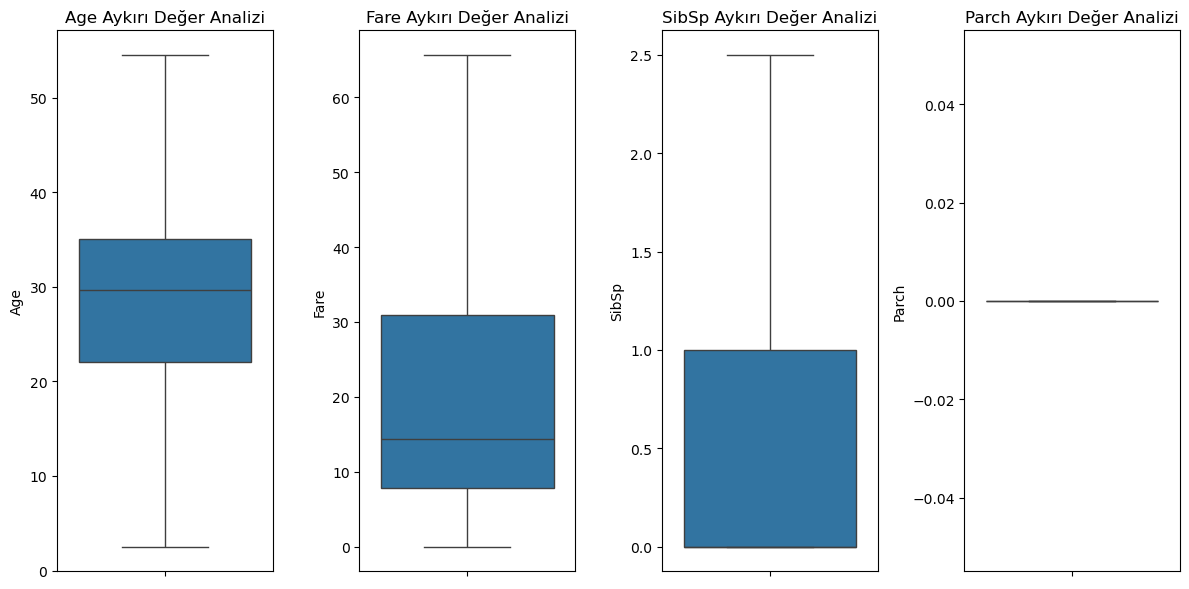

In [821]:
# Sürekli değişkenleri seçelim
continuous_columns = ["Age", "Fare", "SibSp", "Parch"]

# Grafik boyutunu ayarla
plt.figure(figsize=(12,6))

# Her değişken için ayrı kutu grafiği çiz
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(1, len(continuous_columns), i)  # Alt grafikler oluştur
    sns.boxplot(y=df[col])
    plt.title(f"{col} Aykırı Değer Analizi")

plt.tight_layout()  # Grafiklerin üst üste binmesini önler
plt.show()

In [823]:
# Kategorik Verileri Sayısal Hale Getirme

# 1.Yöntem
#df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

# 2.Yöntem (LabelEncoder())
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])

In [825]:
# İlk 5 satırı göster
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,S
1,1,1,0,38.0,1.0,0.0,65.6344,C
2,1,3,0,26.0,0.0,0.0,7.9250,S
3,1,1,0,35.0,1.0,0.0,53.1000,S
4,0,3,1,35.0,0.0,0.0,8.0500,S


In [827]:
# Limanlara göre binen yolcu sayıları
embarked_counts = df["Embarked"].value_counts()
print(embarked_counts)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [829]:
# Embarked sütununu One-Hot Encoding ile dönüştürme ("Embarked_S", "Embarked_C", "Embarked_Q" sütunları eklenir)

# Encoder'ı tanımla (sparse yerine sparse_output kullan)
encoder = OneHotEncoder(sparse_output=False, drop=None)  # 'drop=None' tüm sütunları korur

# "Embarked" sütununu dönüştür
encoded_columns = encoder.fit_transform(df[["Embarked"]])

# Yeni sütun isimlerini al
column_names = encoder.get_feature_names_out(["Embarked"])

# Yeni DataFrame oluştur
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Orijinal DataFrame ile birleştir
df = pd.concat([df, encoded_df], axis=1)

# Orijinal "Embarked" sütununu kaldır
df.drop(columns=["Embarked"], inplace=True)

In [831]:
# İlk 5 satırı göster
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1.0,0.0,65.6344,1.0,0.0,0.0
2,1,3,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


In [833]:
pclass_counts = df["Pclass"].value_counts()
print(pclass_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [835]:
# Pclass sütununu One-Hot Encoding ile dönüştürme ("Pclass_1", "Pclass_2", "Pclass_3" sütunları eklenir)

# Encoder'ı tanımla (sparse yerine sparse_output kullan)
encoder = OneHotEncoder(sparse_output=False, drop=None)  # 'drop=None' tüm sütunları korur

# "Pclass" sütununu dönüştür
encoded_columns = encoder.fit_transform(df[["Pclass"]])

# Yeni sütun isimlerini al
column_names = encoder.get_feature_names_out(["Pclass"])

# Yeni DataFrame oluştur
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Orijinal DataFrame ile birleştir
df = pd.concat([df, encoded_df], axis=1)

# Orijinal "Pclass" sütununu kaldır
df.drop(columns=["Pclass"], inplace=True)

In [837]:
# İlk 5 satırı göster
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,38.0,1.0,0.0,65.6344,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [625]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Age", "Fare", "SibSp", "Parch"]] = scaler.fit_transform(df[["Age", "Fare", "SibSp", "Parch"]])

print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    1  0.375000    0.4    0.0  0.110460         0.0   
1         1       1    0  0.682692    0.4    0.0  1.000000         1.0   
2         1       3    0  0.451923    0.0    0.0  0.120745         0.0   
3         1       1    0  0.625000    0.4    0.0  0.809027         0.0   
4         0       3    1  0.625000    0.0    0.0  0.122649         0.0   

   Embarked_Q  Embarked_S  
0         0.0         1.0  
1         0.0         0.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


In [839]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Age", "Fare", "SibSp", "Parch"]] = scaler.fit_transform(df[["Age", "Fare", "SibSp", "Parch"]])

print(df.head())

   Survived  Sex       Age     SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
0         0    1 -0.611917  0.810220    0.0 -0.820552         0.0         0.0   
1         1    0  0.715304  0.810220    0.0  2.031623         1.0         0.0   
2         1    0 -0.280111 -0.602512    0.0 -0.787578         0.0         0.0   
3         1    0  0.466450  0.810220    0.0  1.419297         0.0         0.0   
4         0    1  0.466450 -0.602512    0.0 -0.781471         0.0         0.0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0         1.0       0.0       0.0       1.0  
1         0.0       1.0       0.0       0.0  
2         1.0       0.0       0.0       1.0  
3         1.0       1.0       0.0       0.0  
4         1.0       0.0       0.0       1.0  


In [841]:
df.to_csv("Titanic_Cleaned.csv", index=False)